Курсовой проект
1. Подготовка на обучающей выборке 



In [495]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели



# 2. Разделение датасета
from sklearn.model_selection import train_test_split, cross_val_score

# 3. Модели
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
 

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from datetime import datetime


In [496]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 5)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 5)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [497]:
DATASET_PATH = 'train.csv'
df = pd.read_csv(DATASET_PATH, sep=',')

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [456]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [457]:
df['HouseYear'].describe()
#чистим года постройки, явно аномалии есть

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [498]:
df['HouseYear'].min()
#минимальное значение нормальное
df['HouseYear'].max()
#в максиммальном ошибка в заполнении
df['HouseYear'].value_counts()

def houseyear(X):
    X[(X['HouseYear'] > 2020)]
    # два дома с ненормальными датами
    # меняем на медиану
    median_hy = X['HouseYear'].median()
    median_hy
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = median_hy
    df.loc[df['HouseYear'] > 2020, 'HouseYear'].count()
    return X

df = houseyear(df)

In [515]:
#проверяем этажность дома в 0 этажей
df.loc[df['HouseFloor'] == 0].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [527]:
#кол-во этажей в доме = 0 , меняем на медиану из выборки по высоте домов, в которых квартиры на таком же этаже



def floor1(X):    
    df_fl = X.loc[X['HouseFloor'] == 0,'Floor']

    for i in df_fl:

        median_hf = X.loc[(X['Floor'] == i)  & (X['HouseFloor'] > i), 'HouseFloor'].median()
        #print(median_hf)
        X.loc[X['HouseFloor'] == 0,'HouseFloor'] =  median_hf
    
    condition = (X['HouseFloor'].isna())
    #LifeSquare is Nan заменяем на         
    X.loc[condition, 'HouseFloor'] = X.loc[condition, 'Floor'] + 3
    #X.loc[X['HouseFloor'] == 0]
    return X


df = floor1(df)


df.loc[df['Id'] == 11993]  

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,80.312926,8.0,14,36.5,1977,0.075779,1,1,6,1437,3,0,2,1,221244.156664


In [462]:
# проверяем есть-ли наблюдения где этаж квартиры выше, чем этажность дома

df.loc[df['HouseFloor'] < df['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
35,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000,B,B,33,7425,1,NaN,2,5,B,402871.916317
44,10521,38,3.0,104.211396,106.340403,0.0,20,17.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


In [500]:
#есть, делаем по аналогии с предыдущей заменой
def floor2(X):    
    df_ls = X.loc[X['HouseFloor'] < X['Floor'],'Floor']
    for i in df_ls:

        median_hf = X.loc[(X['Floor'] == i)  & (X['HouseFloor'] > i), 'HouseFloor'].median()
        #print(median_hf)
        X.loc[X['HouseFloor'] < i,'HouseFloor'] =  median_hf
    return X

df = floor2(df)    
df.loc[df['HouseFloor'] < df['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [464]:
#отсутствующие значения
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [501]:
#этот признак вообще убираем
df.drop(columns='Healthcare_1', inplace=True)

In [466]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [503]:

def kitchen(X):
    #медиана для кухонь 
    X.loc[X['KitchenSquare'] <= 1, 'KitchenSquare'].count()
    #df.loc[df['KitchenSquare'] > 1, 'KitchenSquare'].mean()
    median_k = X.loc[X['KitchenSquare'] > 1, 'KitchenSquare'].median()

    #Кухни там где площадь меньше или равно 1м2 заменяем на медиану
    X.loc[X['KitchenSquare'] <= 1, 'KitchenSquare'] = median_k

    X.loc[X['KitchenSquare'] <= 1, 'KitchenSquare'].count()
    return X

df = kitchen(df)
 

In [468]:
df.loc[df['LifeSquare'] > df['Square']].head(10)
#Жилая площадь не может быть больше общей площади, вычисляем среднее значение для жилой и обычной площади, в тех данных где
# общая площадь больше жилой, считаем разницу межуд средними значениями общей и жилой площади, там где жилая превышает общую
# заменяем жилую на общую минус разница между срежними значениями


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,8.0,3,36.5,2014,0.034656,B,B,0,168,0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,8.0,20,36.5,2017,0.060753,B,B,15,2787,2,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,8.0,17,36.5,2016,0.007122,B,B,1,264,0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,8.0,4,36.5,2017,0.069753,B,B,53,13670,4,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,8.0,5,36.5,2015,0.072158,B,B,2,629,1,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,36.5,1964,0.133215,B,B,49,11395,3,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,8.0,12,36.5,2017,0.075779,B,B,6,1437,3,0,2,B,165071.825722
212,1748,88,2.0,5.497061,67.628717,8.0,24,36.5,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,36.5,1977,0.072158,B,B,2,629,1,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,8.0,12,36.5,1977,0.211401,B,B,9,1892,0,0,1,B,182228.520030


In [504]:
def lifesquare(X):
    mean_ls = X.loc[X['LifeSquare'] <  X['Square'], 'Square'].mean()
    mean_s = X.loc[X['LifeSquare'] <  X['Square'], 'Square'].mean()
    mean_lst = mean_s - mean_ls

    X.loc[X['LifeSquare'] >  X['Square'], 'LifeSquare'] = X['Square'] - mean_lst

    #df.loc[df['LifeSquare'] > df['Square'],'LifeSquare'].count()

    condition = (X['LifeSquare'].isna())


    #LifeSquare is Nan заменяем на         
    X.loc[condition, 'LifeSquare'] = X['Square'] - mean_lst
    return X

df = lifesquare(df)


In [505]:

df.isna().sum()


Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [506]:
#Заменяем  категории на бинарные значения
def binary_to_numbers(X):
    binary_to_numbers = {'A': 0, 'B': 1}

    X['Ecology_2'] = X['Ecology_2'].replace(binary_to_numbers)
    X['Ecology_3'] = X['Ecology_3'].replace(binary_to_numbers)
    X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
    return X

df = binary_to_numbers(df)

In [507]:
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,36.5,1969,0.089040,1,1,33,7976,5,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,36.5,1978,0.000070,1,1,46,10309,1,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,8.0,8,36.5,1968,0.049637,1,1,34,7759,0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,36.5,1977,0.437885,1,1,23,5735,3,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,36.5,1976,0.012339,1,1,35,5776,1,2,4,1,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,36.5,2011,0.309479,1,1,35,7715,4,0,6,1,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,36.5,1960,0.460556,1,1,20,4386,14,1,5,1,296021.204377
7,11993,74,2.0,80.312926,80.312926,8.0,14,36.5,1977,0.075779,1,1,6,1437,3,0,2,1,221244.156664
8,5172,1,2.0,64.511437,64.511437,8.0,9,36.5,1977,0.007122,1,1,1,264,0,0,1,1,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,36.5,2014,0.075779,1,1,6,1437,3,0,2,1,95380.220993


Train R2:	0.96051
Test R2:	0.74063


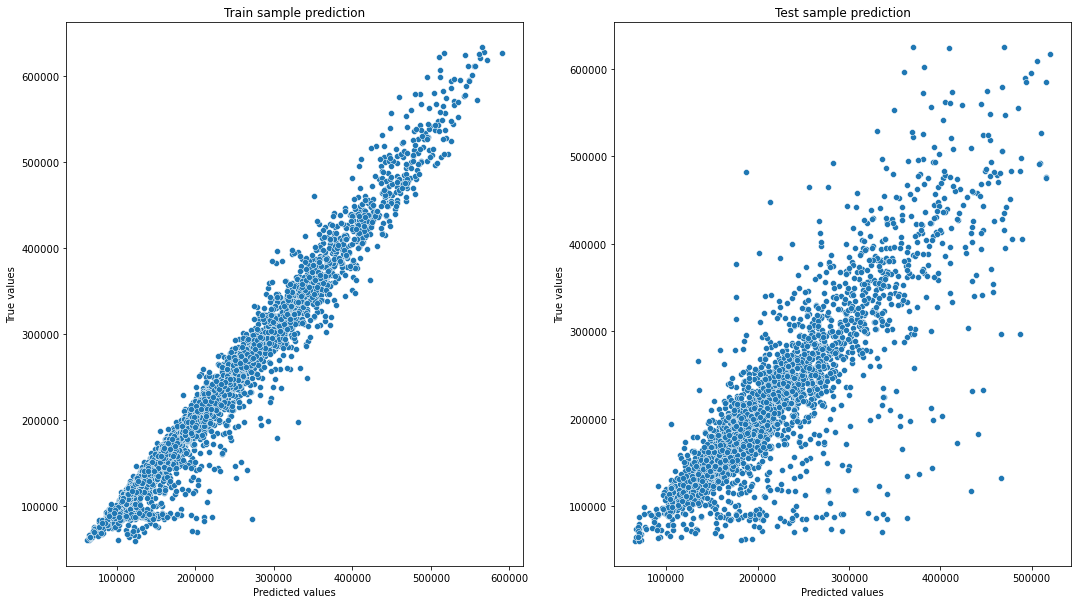

In [508]:
X = df.drop(columns='Price')
y = df['Price']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=25)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [474]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
3,Square,0.389167
12,Social_1,0.102335
13,Social_2,0.095228
2,Rooms,0.068946
14,Social_3,0.057885
1,DistrictId,0.047718
9,Ecology_1,0.044795
4,LifeSquare,0.043780
8,HouseYear,0.040254
0,Id,0.028049


2. Обработка на тестовой выборке

In [532]:
#Тестовая выборка
TEST_DATASET_PATH = 'test.csv'
df_test = pd.read_csv(TEST_DATASET_PATH, sep=',')
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [533]:
df_test = houseyear(df_test)
df_test = floor2(df_test)   
df_test.drop(columns='Healthcare_1', inplace=True)
df_test = kitchen(df_test)
df_test = lifesquare(df_test)
df_test = binary_to_numbers(df_test)


df_test.shape



(5000, 18)

In [534]:
df_test = floor1(df_test)
df_test.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [535]:
predictions = rf_model.predict(df_test)
predictions

array([157022.10309218, 231687.50758281, 250394.67043902, ...,
       332121.35134142, 216902.11433042, 173014.6979063 ])

In [536]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [537]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,725,157022.103092
1,15856,231687.507583
2,5480,250394.670439
3,15664,326591.925804
4,14275,139142.417592


In [538]:
submit.to_csv('rf_submit.csv', index=False)